In [1]:
import numpy as np
import pandas as pd
import tqdm
import os
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [39]:
import matplotlib.pyplot as plt 
import platform                

# 웬만하면 해주는 것이 좋다.
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': # 맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':# 윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

In [2]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

plt.rc('font', family=font_name)

fm._rebuild()

In [3]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
hts_data_2018 = pd.read_csv('/content/drive/MyDrive/bigcontest/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2018.csv', encoding = 'euc-kr')
hts_data_2019 = pd.read_csv('/content/drive/MyDrive/bigcontest/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2019.csv', encoding = 'euc-kr')
hts_data_2020 = pd.read_csv('/content/drive/MyDrive/bigcontest/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2020.csv', encoding = 'euc-kr')
hts_data_2021 = pd.read_csv('/content/drive/MyDrive/bigcontest/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2021.csv', encoding = 'euc-kr')

In [30]:
hts_data = pd.concat([hts_data_2021, hts_data_2020])
hts_data = pd.concat([hts_data, hts_data_2019])
hts_data = pd.concat([hts_data, hts_data_2018])
hts_data

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PIT_VEL,STADIUM
0,2021,20210403SSWO0,210403_140101,62415,SS,1,131.70,-5.8,땅볼아웃,144.35,고척
1,2021,20210403SSWO0,210403_140857,74163,WO,1,116.87,18.4,1루타,132.34,고척
2,2021,20210403SSWO0,210403_141459,75125,WO,1,160.00,16.8,2루타,120.78,고척
3,2021,20210403SSWO0,210403_142105,51463,SS,2,160.37,35.2,플라이,142.66,고척
4,2021,20210403SSWO0,210403_142217,75566,SS,2,140.08,33.6,플라이,142.97,고척
...,...,...,...,...,...,...,...,...,...,...,...
35024,2018,20181014OBLT0,181014_161746,75334,OB,9,161.12,-7.4,1루타,145.81,사직
35025,2018,20181014OBLT0,181014_162521,68205,OB,9,131.71,26.4,플라이,146.38,사직
35026,2018,20181014OBLT0,181014_162755,76509,LT,9,119.64,28.8,플라이,141.23,사직
35027,2018,20181014OBLT0,181014_162938,60523,LT,9,164.98,15.7,직선타,125.59,사직


In [11]:
hts_data.describe()

,GYEAR,PCODE,INN,HIT_VEL,HIT_ANG_VER,PIT_VEL
count,120745.000000,120745.000000,120745.000000,120745.000000,120745.000000,120745.00000
mean,2019.293188,69753.281916,4.935070,133.732175,17.394404,135.79528
std,1.041636,7388.967977,2.585468,21.337877,24.100255,9.21249
min,2018.000000,50054.000000,1.000000,9.880000,-68.900000,82.50000
25%,2018.000000,63963.000000,3.000000,121.680000,-1.500000,129.60000
50%,2019.000000,69209.000000,5.000000,137.700000,14.500000,137.49000
75%,2020.000000,76313.000000,7.000000,149.480000,32.200000,142.99000
max,2021.000000,99810.000000,12.000000,210.130000,89.800000,159.40000


In [12]:
hts_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120745 entries, 0 to 35028
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   GYEAR        120745 non-null  int64  
 1   G_ID         120745 non-null  object 
 2   PIT_ID       120745 non-null  object 
 3   PCODE        120745 non-null  int64  
 4   T_ID         120745 non-null  object 
 5   INN          120745 non-null  int64  
 6   HIT_VEL      120745 non-null  float64
 7   HIT_ANG_VER  120745 non-null  float64
 8   HIT_RESULT   120745 non-null  object 
 9   PIT_VEL      120745 non-null  float64
 10  STADIUM      120745 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 11.1+ MB


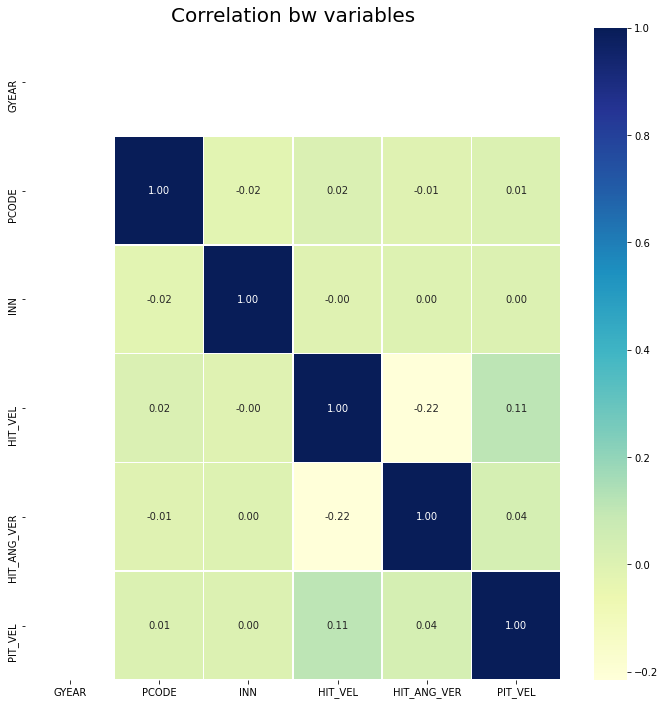

In [ ]:
%matplotlib inline
plt.figure(figsize = (12, 12))
sns.heatmap(data = hts_data_2021.corr(), annot = True, fmt = '.2f', linewidths = .5, cmap = 'YlGnBu')
plt.title('Correlation bw variables', fontsize = 20)
plt.show()

In [72]:
hr_hts = hts_data.loc[hts_data['HIT_RESULT']== '홈런']
two_hts = hts_data.loc[hts_data['HIT_RESULT']== '2루타']
three_hts = hts_data.loc[hts_data['HIT_RESULT']== '3루타']
one_hts = hts_data.loc[hts_data['HIT_RESULT']== '1루타']

In [36]:
hr_hts

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PIT_VEL,STADIUM
55,2021,20210404HHKT0,210404_150953,78548,KT,5,149.83,33.2,홈런,141.65,수원
114,2021,20210404HTOB0,210404_163821,79215,OB,8,154.12,23.0,홈런,148.56,잠실
122,2021,20210404LGNC0,210404_141754,62947,NC,1,169.58,39.9,홈런,139.49,창원
162,2021,20210404LTSK0,210404_142331,75847,SK,2,152.22,33.9,홈런,145.78,문학
176,2021,20210404LTSK0,210404_150937,76267,SK,4,158.84,29.2,홈런,144.06,문학
...,...,...,...,...,...,...,...,...,...,...,...
34935,2018,20181013WOSS0,181013_174621,67450,SS,2,159.86,23.2,홈런,139.86,대구
34939,2018,20181013WOSS0,181013_180723,68345,WO,3,148.74,33.0,홈런,145.15,대구
34950,2018,20181013WOSS0,181013_185658,79456,SS,5,153.84,28.3,홈런,130.62,대구
34969,2018,20181013WOSS0,181013_201321,67450,SS,8,156.92,22.2,홈런,135.83,대구


In [32]:
hts_data

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PIT_VEL,STADIUM
0,2021,20210403SSWO0,210403_140101,62415,SS,1,131.70,-5.8,땅볼아웃,144.35,고척
1,2021,20210403SSWO0,210403_140857,74163,WO,1,116.87,18.4,1루타,132.34,고척
2,2021,20210403SSWO0,210403_141459,75125,WO,1,160.00,16.8,2루타,120.78,고척
3,2021,20210403SSWO0,210403_142105,51463,SS,2,160.37,35.2,플라이,142.66,고척
4,2021,20210403SSWO0,210403_142217,75566,SS,2,140.08,33.6,플라이,142.97,고척
...,...,...,...,...,...,...,...,...,...,...,...
35024,2018,20181014OBLT0,181014_161746,75334,OB,9,161.12,-7.4,1루타,145.81,사직
35025,2018,20181014OBLT0,181014_162521,68205,OB,9,131.71,26.4,플라이,146.38,사직
35026,2018,20181014OBLT0,181014_162755,76509,LT,9,119.64,28.8,플라이,141.23,사직
35027,2018,20181014OBLT0,181014_162938,60523,LT,9,164.98,15.7,직선타,125.59,사직


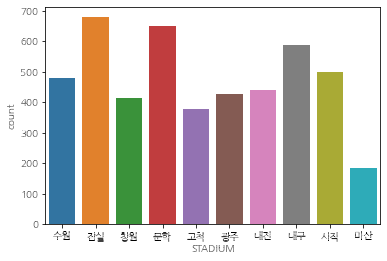

In [20]:
# 구장별 홈런 생산
sns.countplot(x='STADIUM', data=hr_hts)
plt.show()

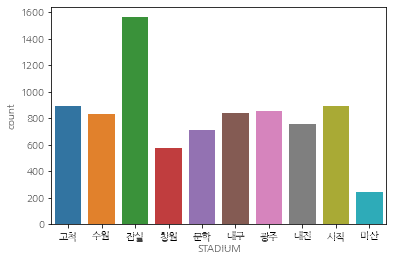

In [38]:
#구장별 2루타 생산
sns.countplot(x='STADIUM', data=two_hts)
plt.show()

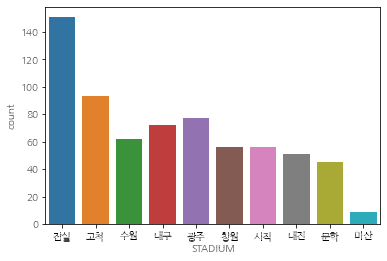

In [39]:
#구장별 3루타 생산
sns.countplot(x='STADIUM', data=three_hts)
plt.show()

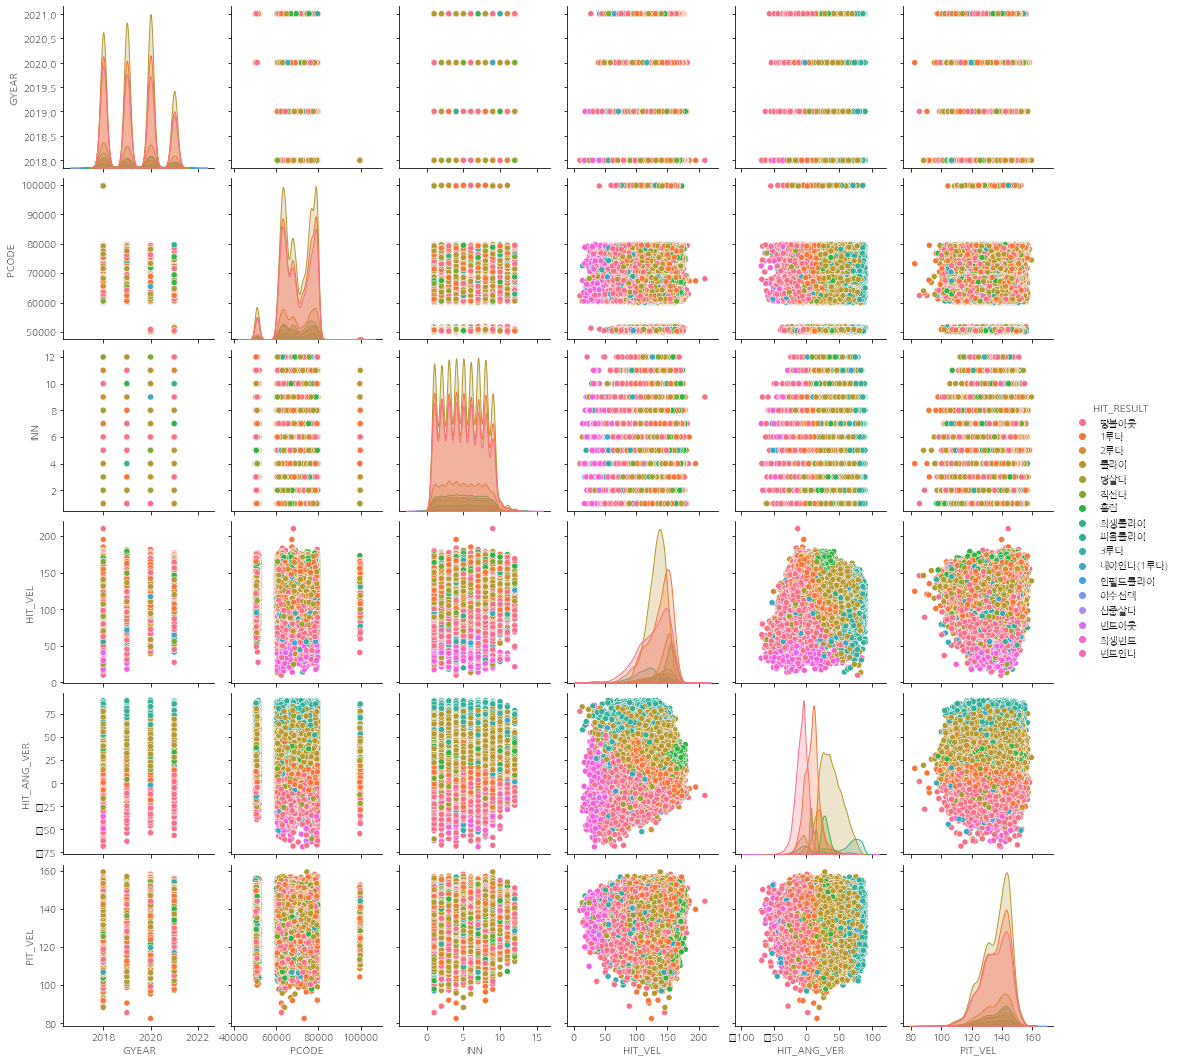

In [34]:
sns.pairplot(data = hts_data, hue = 'HIT_RESULT')
plt.show()

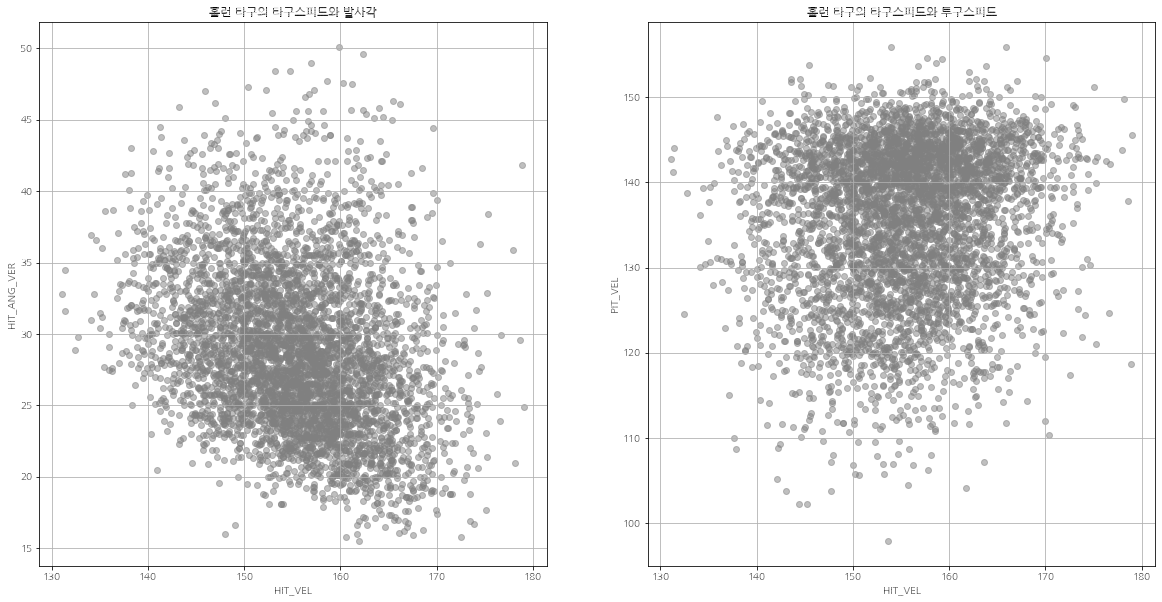

In [66]:
# 홈런 타구 분석
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.title("홈런 타구의 타구스피드와 발사각")
plt.scatter(hr_hts["HIT_VEL"], hr_hts["HIT_ANG_VER"], color='grey', alpha=.5)
plt.xlabel("HIT_VEL")
plt.ylabel("HIT_ANG_VER")
plt.grid()

plt.subplot(1, 2, 2)
plt.title("홈런 타구의 타구스피드와 투구스피드")
plt.scatter(hr_hts["HIT_VEL"], hr_hts["PIT_VEL"], color='grey', alpha=.5)
plt.xlabel("HIT_VEL")
plt.ylabel("PIT_VEL")
plt.grid()
plt.show()

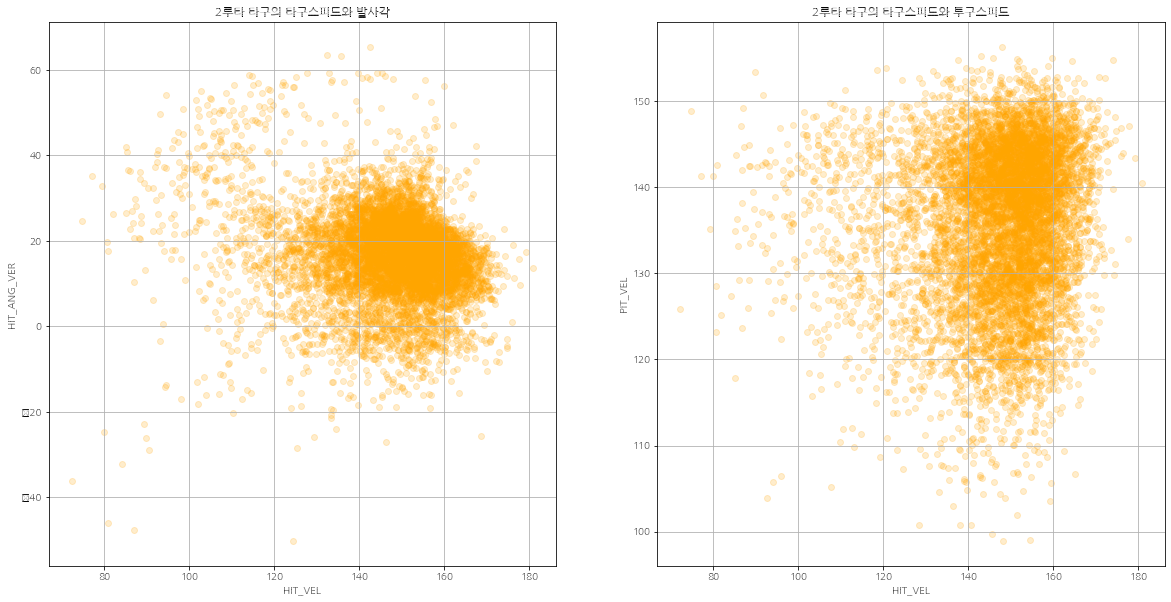

In [70]:
# 2루타 타구 분석
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.title("2루타 타구의 타구스피드와 발사각")
plt.scatter(two_hts["HIT_VEL"], two_hts["HIT_ANG_VER"], color='orange', alpha=.2)
plt.xlabel("HIT_VEL")
plt.ylabel("HIT_ANG_VER")
plt.grid()

plt.subplot(1, 2, 2)
plt.title("2루타 타구의 타구스피드와 투구스피드")
plt.scatter(two_hts["HIT_VEL"], two_hts["PIT_VEL"], color='orange', alpha=.2)
plt.xlabel("HIT_VEL")
plt.ylabel("PIT_VEL")
plt.grid()
plt.show()

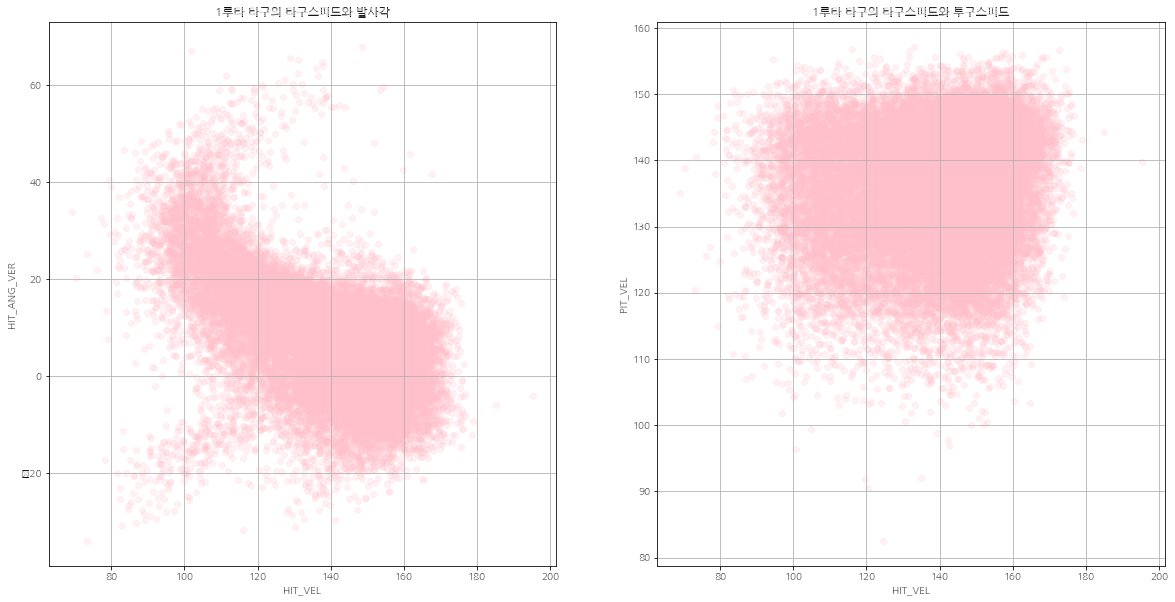

In [73]:
# 1루타 타구 분석
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.title("1루타 타구의 타구스피드와 발사각")
plt.scatter(one_hts["HIT_VEL"], one_hts["HIT_ANG_VER"], color='pink', alpha=.2)
plt.xlabel("HIT_VEL")
plt.ylabel("HIT_ANG_VER")
plt.grid()

plt.subplot(1, 2, 2)
plt.title("1루타 타구의 타구스피드와 투구스피드")
plt.scatter(one_hts["HIT_VEL"], one_hts["PIT_VEL"], color='pink', alpha=.2)
plt.xlabel("HIT_VEL")
plt.ylabel("PIT_VEL")
plt.grid()
plt.show()